# `20180814a` - Testing interleaved acqs for a tentative 128Msps

In [1]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline

Not loading RPi.GPIO as not on RPi


In [2]:
x = us_spi()
x.JSON["firmware_version"]="e_un0"
x.JSON["experiment"]["id"] = "20180814a"
x.JSON["experiment"]["description"]="Testing if the lib works"
x.JSON["experiment"]["probe"]="piezo"
x.JSON["experiment"]["target"] = "a reflector few cms away"
x.JSON["V"]="48"
x.JSON["N"] = 1 # Experiment ID

In [3]:
x.init()                                    # Inits the FPGA

Curve = x.CreateDACCurve(300,900,True)[0]   # Sets the DAC, 50mV to 850mv

pyUn0.py:149: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(CS_FLASH,GPIO.OUT)
pyUn0.py:152: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(PRESET,GPIO.OUT)


Reset GPIO 23 - Low 1s
Reset GPIO 23 - High 0.2s
spi.cshigh is False
spi mode is 1
spi maxspeed is 2000000hz
Setting up the DAC


In [10]:
x.JSON["N"] = 1 

In [26]:
x.setNLines(1)				            # Setting the number of lines
x.setMultiLines(False)				        # Multi lines acquisition	
x.setMsps(0) 					            # Acquisition Freq
for k in range(10):
    A = x.setTimings(200,100,2000,25000+5*k,105000)	# Settings the series of pulses
    #print A
    # Do the acquisition
    x.JSON["data"] = x.doAcquisition()
    x.JSON["N"] = x.JSON["N"] + 1 

Number of lines: 1
Doing a single line
Acquisition frequency set at 64.0 Msps
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 25000 ns --  0xc 0x80
Acquisition length:  105000 ns --  0x34 0x80
setPulseTrain Lacq 105000
NAcq = 5120
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Took 1.24 seconds to transfer.
for 10242 transfers of data
20180813a-1.json: file saved.
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 25000 ns --  0xc 0x80
Acquisition length:  105000 ns --  0x34 0x80
setPulseTrain Lacq 105000
NAcq = 5056
0%
9%
19%
29%
39%
49%
59%
69%
79%
89%
99%
Took 1.22 seconds to transfer.
for 10114 transfers of data
20180813a-2.json: file saved.
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 25007 ns --  0xc 0x81
Acquisition length:  105000 ns --  0x34 0x80
setPulseTrain Lacq 105000
NAcq = 5056
0%
9%
19%
29%
39%
49%
59%
69%
7

# Let's open this data

Data acquired
133
Data acquired
132


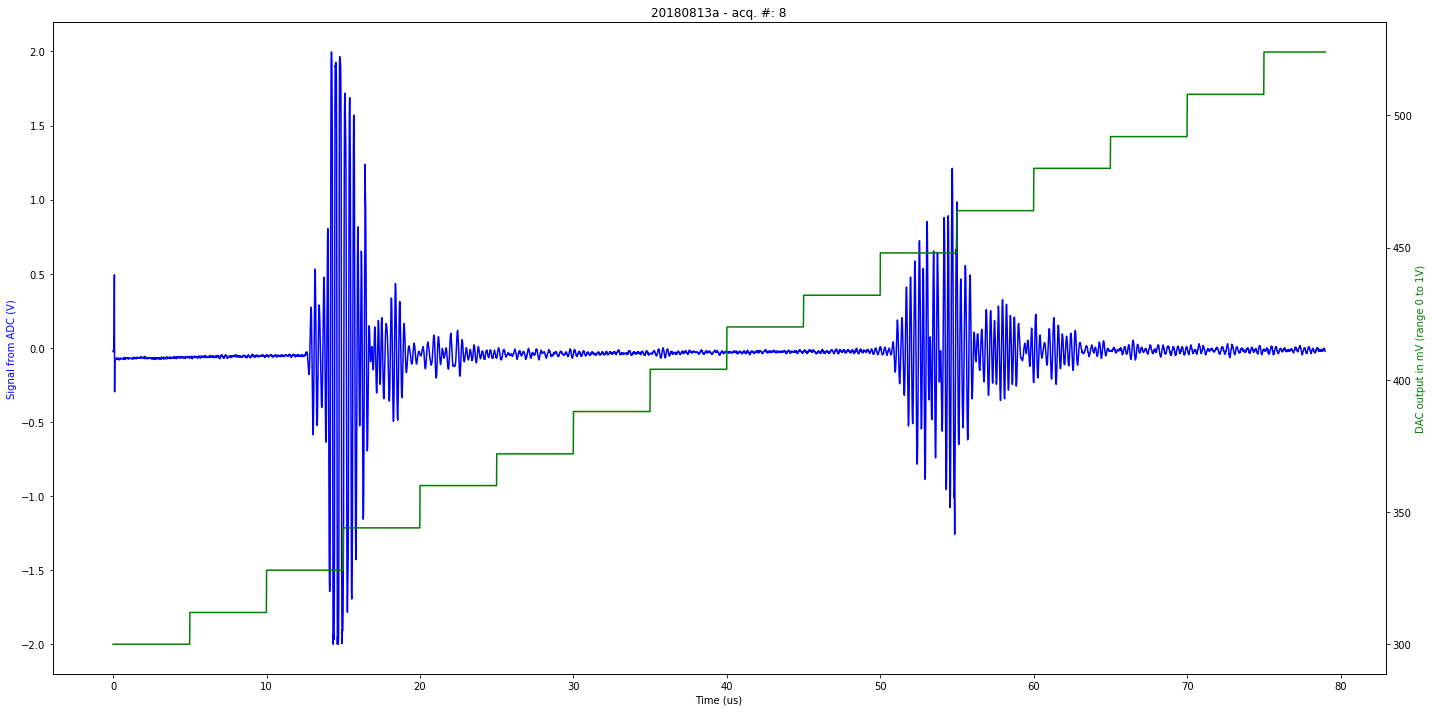

In [58]:
x = us_json()
x.JSONprocessing("data/20180813a-9.json")
print x.Registers["228"]
y = us_json()
y.JSONprocessing("data/20180813a-8.json")
print y.Registers["228"]
y.mkImg()

# Plotting the two series

with "wrong" t scale.

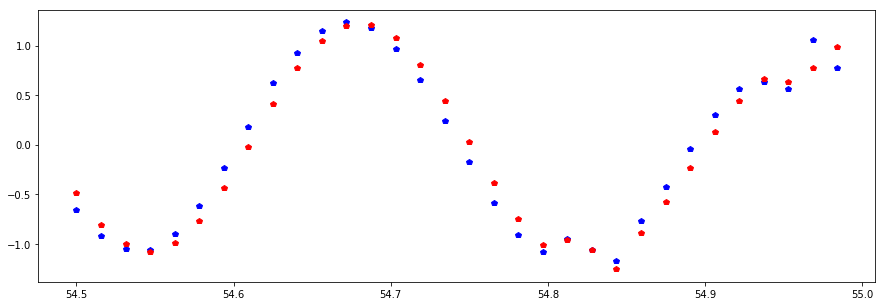

In [56]:
A = 54*64+32
B = 55*64
plt.figure(figsize=(15,5))
plt.plot(x.t[A:B],x.tmp[A:B],"bp")
plt.plot(y.t[A:B],y.tmp[A:B],"rp")
plt.show()

# Now, let's readjust the time axis to consider the 1/2 phase offset

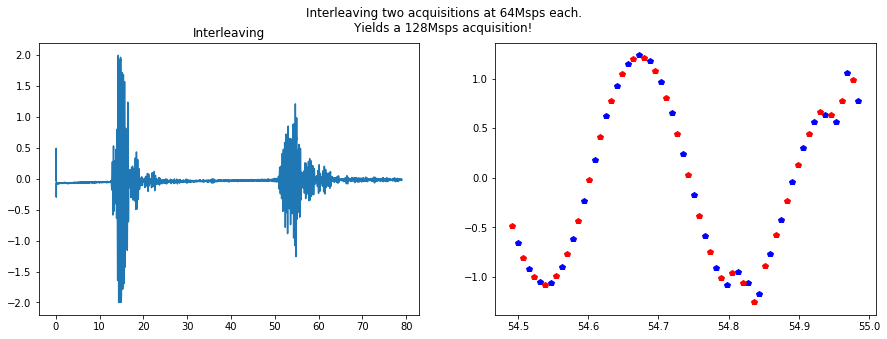

In [57]:
NewT = [k -1.0/128 for k in x.t[A:B]]
A = 54*64+32
B = 55*64

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(x.t,y.tmp)
plt.suptitle ("Interleaving two acquisitions at 64Msps each.\nYields a 128Msps acquisition!")
ax2.set_title('Interleaving')
ax2.set_title('Overall signal')
ax2.plot(x.t[A:B],x.tmp[A:B],"bp")
ax2.plot(NewT,y.tmp[A:B],"rp")
FileName = "128Msps_"+x.iD+"-"+str(x.N)+"-detail.jpg"
plt.savefig(FileName)
plt.show() 